# Class 16: Dynamics on Networks 1 — Diffusion and Random Walks

Goal of today's class:
1. Introduce dynamics on networks
2. Define random walk dynamics
3. Explore core results in random walks on networks

*Acknowledgement: Some of the material in this lesson is based on materials by Matteo Chinazzi and Qian Zhang.*
__________

1. Come in. Sit down. Open Teams.
2. Find your notebook in your /Class_16/ folder.
________

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('axes', axisbelow=True)
rc('axes', fc='w')
rc('figure', fc='w')
rc('savefig', fc='w')

![](images/randomwalks.png)

## Random walks in 1-dimension (not networks yet!)
The concept of a random walk shows up all over the place in mathematics and across various scientific disciplines; the key insight is to use this notion as a tool to study processes where a system evolves based on a series of random, discrete steps. In this section, we begin with a formal definition of the 1-D random walker and examine key metrics such as expected displacement, variance, and probability distributions that characterize the walk’s dynamics over time.

**Some good references:**
1. Lawler, G.F. & Limic, V. (2010). Random walk: a modern introduction (Vol. 123). Cambridge University Press. https://www.cambridge.org/core/books/random-walk-a-modern-introduction/7DA2A372B5FE450BB47C5DBD43D460D2
2. Lovász, L. (1993). Random walks on graphs. *Combinatorics, Paul Erdos is Eighty*, 2(1-46), 4. https://www.cse.cuhk.edu.hk/~cslui/CMSC5734/LovaszRadnomWalks93.pdf

_________


Consider a walker starting at an origin point $y=0$ on a 1-D integer lattice, where each position on the lattice corresponds to an integer. At each discrete time step, $t$, the walker either moves one step to **up** ($y_{t+1} = y_{t}+1$) or one step **down** ($y_{t+1} = y_{t}-1$), with equal probability, $P(\textrm{move up}) = P(\textrm{move down}) = \frac{1}{2}$. (Note this can also be thought of as a 1-D line that the walker moves left or right on, but for visualization purposes, let's use up/down.) This unbiased process is governed by a Bernoulli distribution, where each step is independent of the previous ones.



Let $Y_t$ denote the position of the random walker at time $t$. $Y_t$ can then be written as the sum of $t$ i.i.d. random variables $\eta_i$, where $\eta_i$ corresponds the outcome at each step (i.e., $\eta_i = \pm 1$), $Y_t = \sum_{i=1}^t \eta_i$. The expectation of $\eta_i$ is 0, and its variance is 1. Therefore, the expected position of a given random walker at time $t$ can be written $E[Y_t] = t E[\eta_i] = 0$, and the variance of the walker's position grows with $t$ as $\textrm{Var}(Y_t) = t \textrm{Var}(\eta_i) = t$.

As $t \rightarrow \infty$, we see that the position of the random walker can be estimated by a normal distribution $Y_t \sim \mathcal{N} (0, t)$ (see: the Central Limit Theorem), and as a result, the probability density over the walker's position at large enough $t$ is:

$$P(Y_t = y) \approx \dfrac{1}{\sqrt{2\pi t}} \exp \left (- \dfrac{y^2}{2t} \right)$$

This behavior forms one of the key insights for building random walkers beyond one dimensions! In Physics, we often see it used for studying diffusion processes. In Economics or Finance, we can use it as a foundation for building models of the stock market. In Biology, we can think of it as the base for models of particle motion in a cell. And in Network Science, random walks can be used as the starting point for algorithms that characterize network connectivity or centrality, community structure, spectral properties, and more. 
____________

### 8-min challenge! Code a single random walker
Let's start the class off with a challenge. As defined above, code a single random walker, moving up and down with equal probability ($p=0.5$). Visualize this walker's trajectory over 10,000 timesteps.

You've been given a starter-function `single_1d_walkers` below.

If you have time, adapt this to a general function that returns the trajectory for `n_iter` random walkers.

In [2]:
def single_1d_walkers(t=10000, start_position=0, p_up=0.5):
    """
    Simulates the path of a single random walker on a 1-dimensional lattice.

    Parameters
    ----------
    t : int, optional
        The number of steps the random walker will take.
    start_position : int, optional
        The starting position of the walker on the lattice. Default is 0.
    p_up : float, optional
        The probability that the walker takes an `up` step. 0.5 indicates
        an unbiased random walker.

    Returns
    -------
    positions_over_time: vector of ints
        A list-like object representing the positions of the walker at each
        step, starting from the initial position.

    Notes
    -----
    - At each step, the walker moves either +1 (up) or -1 (down) with equal
      probability.
    - This random walk is unbiased, with each step being independent of the 
      previous one.
    
    Examples
    --------
    >>> random_walk_1d(5, start_position=0)
    [0, 1, 0, 1, 2, 1]
    """
    
    positions_over_time = np.zeros(t)
    
    pass
    
    
    return positions_over_time

*Plot your walker below:*

In [3]:
t = 10000
positions = single_1d_walkers(t)

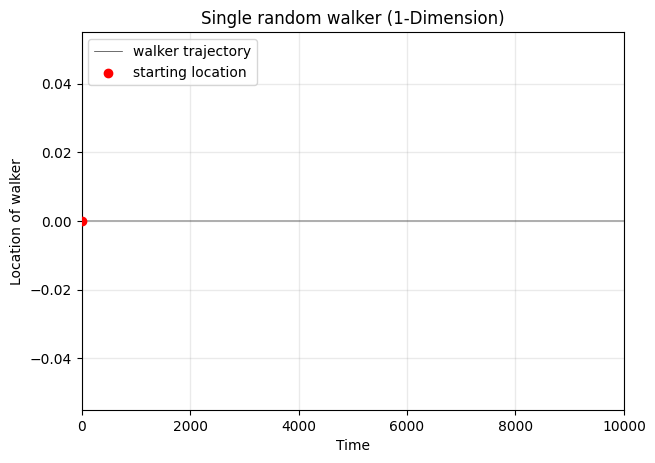

In [4]:
fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)

ax.plot(range(t),positions, lw=0.5, color='.2', label='walker trajectory')
ax.scatter(0,0,color='red',zorder=3,label='starting location')

ax.legend(loc=2)
ax.set_ylabel('Location of walker')
ax.set_xlabel('Time')
ax.grid(alpha=0.2, color='.6', lw=1)
ax.set_title('Single random walker (1-Dimension)')

ylims = ax.get_ylim()
ax.set_ylim(-np.abs(ylims).max(), np.abs(ylims).max())
ax.set_xlim(-1, t+1)


plt.show()

__________

In [5]:
### my attempt!

up_prob = 0.5
probs = [up_prob, 1-up_prob]

timesteps = 10000
n_runs = 20

positions = np.zeros(timesteps)

for t in range(1, timesteps):
    positions[t] = positions[t-1]
    positions[t] += np.random.choice([1,-1], p=probs)

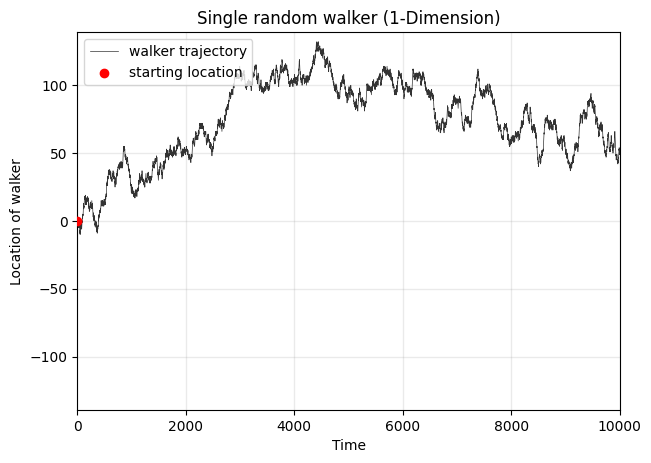

In [6]:
fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)

ax.plot(range(timesteps),positions, lw=0.5, color='.2', label='walker trajectory')
ax.scatter(0,0,color='red',zorder=3,label='starting location')

ax.legend(loc=2)
ax.set_ylabel('Location of walker')
ax.set_xlabel('Time')
ax.grid(alpha=0.2, color='.6', lw=1)
ax.set_title('Single random walker (1-Dimension)')

ylims = ax.get_ylim()
ax.set_ylim(-np.abs(ylims).max(), np.abs(ylims).max())
ax.set_xlim(-1, timesteps+1)

plt.show()

### Note on the implementation above: is there a faster way to do this?

In [7]:
def single_1d_walkers(t=10000, start_position=0, p_up=0.5):
    """
    Simulates the path of a single random walker on a 1-dimensional lattice.

    Parameters
    ----------
    t : int, optional
        The number of steps the random walker will take.
    start_position : int, optional
        The starting position of the walker on the lattice. Default is 0.
    p_up : float, optional
        The probability that the walker takes an `up` step. 0.5 indicates
        an unbiased random walker.

    Returns
    -------
    positions_over_time: vector of ints
        A list-like object representing the positions of the walker at each
        step, starting from the initial position.

    Notes
    -----
    - At each step, the walker moves either +1 (up) or -1 (down) with equal
      probability.
    - This random walk is unbiased, with each step being independent of the 
      previous one.
    
    Examples
    --------
    >>> random_walk_1d(5, start_position=0)
    [0, 1, 0, 1, 2, 1]
    """
    
    # Generate random steps (-1, 0, or 1) for both up and down directions
    directions = np.random.choice([-1, 1],
                                  size=(t, 1),
                                  p=[1-p_up, p_up])

    # Compute the cumulative sum to get the position at each step
    positions_over_time = np.cumsum(directions, axis=0)
    
    return positions_over_time

### What about multiple random walkers?

In [8]:
def random_walk_1d(n_walkers=1, t=10000, start_position=0, p_up=0.5):
    """
    Simulates the path of a single random walker on a 1-dimensional lattice.

    Parameters
    ----------
    n_walkers : int, optional
    
    t : int, optional
        The number of steps the random walker will take.
    start_position : int, optional
        The starting position of the walker on the lattice. Default is 0.
    p_up : float, optional
        The probability that the walker takes an `up` step. 0.5 indicates
        an unbiased random walker.

    Returns
    -------
    positions_over_time: vector of ints
        A list-like object representing the positions of the walker at each
        step, starting from the initial position.

    Notes
    -----
    - At each step, the walker moves either +1 (up) or -1 (down) with equal
      probability.
    - This random walk is unbiased, with each step being independent of the 
      previous one.
    
    Examples
    --------
    >>> random_walk_1d(5, start_position=0)
    [0, 1, 0, 1, 2, 1]
    """
    
    all_walkers = []
    
    for _ in range(n_walkers):
        # Generate random steps (-1, 0, or 1) for both up and down directions
        directions = np.random.choice([-1, 1],
                                      size=(t, 1),
                                      p=[1-p_up, p_up])

        # Compute the cumulative sum to get the position at each step
        positions_over_time = np.cumsum(directions, axis=0)
        
        all_walkers.append(positions_over_time.T[0])
    
    if n_walkers == 1:
        return positions_over_time
    
    else:
        return np.array(all_walkers)

In [9]:
timesteps = 10000
n_iter = 1000
up_prob = 0.5
walkers = random_walk_1d(n_walkers=n_iter, t=timesteps, start_position=0, p_up=up_prob)


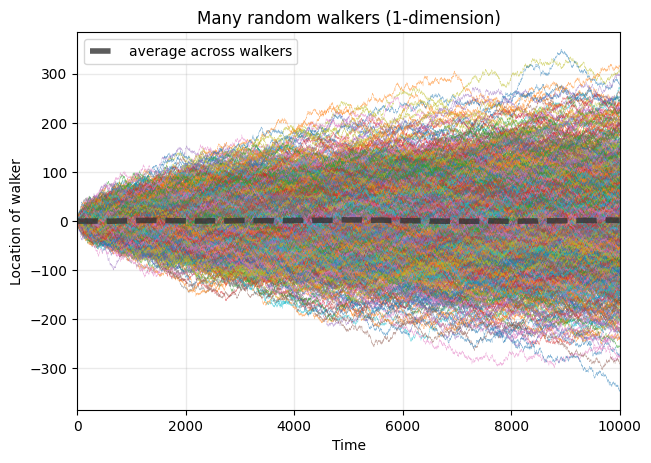

In [10]:
fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)

averages = []
maxes = []

for walker in walkers:
    ax.plot(walker, lw=0.25, alpha=0.5)
    averages.append(list(walker))
    maxes.append(max(walker))

ax.plot(np.array(averages).mean(axis=0),color='.2',lw=4,alpha=0.8,ls='--',
        label='average across walkers')

ax.legend(loc=2)
ax.set_ylabel('Location of walker')
ax.set_xlabel('Time')
ax.grid(alpha=0.2, color='.6', lw=1)
ax.set_title('Many random walkers (1-dimension)')

ylims = ax.get_ylim()
ax.set_ylim(-np.abs(ylims).max(), np.abs(ylims).max())
ax.set_xlim(-1, timesteps+1)


plt.show()

### Question: How does the standard deviation of walkers' locations change over time?

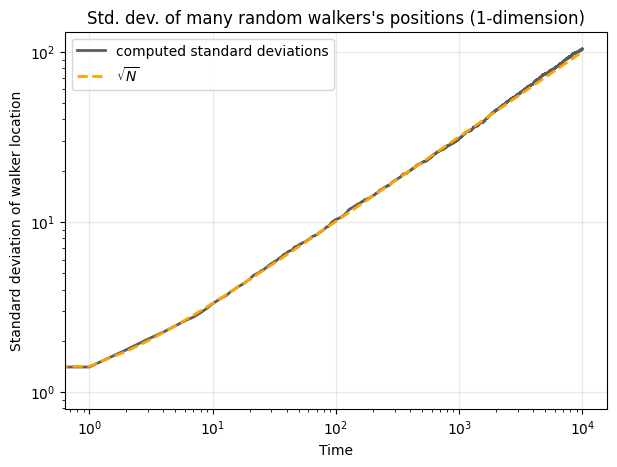

In [11]:
standard_devs = np.array(averages).std(axis=0)

fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)

ax.loglog(standard_devs, color='.2', lw=2, alpha=0.8, label='computed standard deviations')

ax.loglog(np.sqrt(list(range(1,timesteps))),lw=2,color='orange',ls='--', label=r'$\sqrt{N}$')

ax.legend(loc=2)
ax.set_ylabel('Standard deviation of walker location')
ax.set_xlabel('Time')
ax.grid(alpha=0.2, color='.6', lw=1)
ax.set_title("Std. dev. of many random walkers's positions (1-dimension)")


plt.show()

### Question: What is the distribution of the *maximum* value of each walker's trajectory?

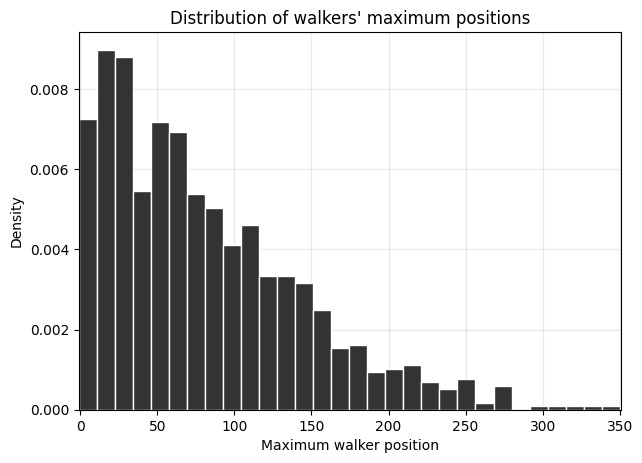

In [12]:
fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)

ax.hist(maxes, bins=30, density=True, ec='w', color='.2')

ax.set_ylabel('Density')
ax.set_xlabel('Maximum walker position')
ax.grid(alpha=0.2, color='.6', lw=1)
ax.set_title("Distribution of walkers' maximum positions")
ax.set_xlim(-1, max(maxes)+1)


plt.show()

**Bonus:** Search a bit about the properties of the distribution of random walkers' final positions --- it's a key concept from statistics!

In [13]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import gumbel_r

# # parameters
# n_walkers = 10_000   # number of walkers per run
# t = 10_000           # steps per walker
# n_repeats = 100     # number of repeated experiments

# max_across_walkers = []
# for i in range(n_repeats):
# #     print(i)
#     # simulate many walkers and record their *final positions*
#     steps = np.random.choice([-1,1], size=(n_walkers, t))
#     positions = steps.cumsum(axis=1)

#     final_positions = positions[:,-1]  # final X_t for each walker per experiment
#     max_across_walkers_i = final_positions.max()
#     max_across_walkers.append(max_across_walkers_i)    

# # theoretical parent scale: s ≈ sqrt(t)
# s = np.sqrt(t)
# N = n_walkers

# # normalization for Gumbel limit
# mu_N = s * np.sqrt(2*np.log(N)) - s * (np.log(np.log(N)) + np.log(4*np.pi)) / (2*np.sqrt(2*np.log(N)))
# beta_N = s / np.sqrt(2*np.log(N))


# # normalized variable

# max_across_walkers = np.array(max_across_walkers)
# Z = (max_across_walkers - mu_N) / beta_N



# # --- plot histogram vs Gumbel pdf
# xs = np.linspace(Z.min(), Z.max(), 400)
# plt.hist(Z, bins=40, density=True, alpha=0.7, ec='w', color='.3', label='Empirical')
# plt.plot(xs, gumbel_r.pdf(xs), lw=2, label='Gumbel(0,1)')
# plt.xlabel(r'$Z = (Y_N - \mu_N)/\beta_N$')
# plt.ylabel('Density')
# plt.title('Extreme (max-across-walkers) distribution → Gumbel')
# plt.legend()
# plt.grid(alpha=0.3)
# plt.show()

__________

## Random walks in 2-dimensions (still not networks yet!)
In the two-dimensional random walk, we imagine a walker starting at an origin point $(x,y) = (0,0)$ on a 2-D integer lattice, where each point corresponds to a coordinate. At each timestep, $t$, a walker moves randomly up / down / left / right with equal probability $P(\textrm{up}) = P(\textrm{down}) = P(\textrm{left}) = P(\textrm{right}) = \frac{1}{4}$.

There are similarities here to the 1-D walkers, such that the expected position of the walker will be 

$$X_t = \sum_{i=1}^{t} \eta_{x,i}, \quad Y_t = \sum_{i=1}^{t} \eta_{y,i}$$

where $ \eta_{x,i} $ and $ \eta_{y,i} $ are random variables representing the steps in the $ x $ and $ y $ directions, respectively. Each of these steps is uniformly distributed over \{-1, 1\}.


Similar to the one-dimensional case, the expected position of the walker remains at the origin: $E[X_t] = E[Y_t] = 0$. The variance of each coordinate grows linearly with time, as in the one-dimensional case. However, the combined radial distance from the origin $ R_t = \sqrt{X_t^2 + Y_t^2} $ is an important quantity that provides a measure of the walker's spread in two dimensions. The expected value of $ R_t $ grows as $E[R_t] \approx \sqrt{t}$ indicating diffusive behavior in two dimensions, with the walker’s distance from the origin increasing proportionally to the square root of time.

2-D random walks are also used to study many processes, from the movement of particles in a fluid (Brownian motion) to animal foraging behavior. This section introduces the two-dimensional random walk as a stepping stone to more complex random walks on networks, where the underlying structure influences the walker’s movement in ways that go beyond free-space diffusion.
________

In [14]:
# Set random seed for reproducibility
# np.random.seed(10)

# Parameters
num_steps = 100000  # Number of steps in the random walk

# Initialize starting position (at origin)
x = np.zeros(num_steps)
y = np.zeros(num_steps)

# Perform the random walk
for i in range(1, num_steps):
    direction = np.random.choice(['up', 'down', 'left', 'right'])  # Choose a direction randomly
    if direction == 'up':
        y[i] = y[i - 1] + 1
        x[i] = x[i - 1]
    elif direction == 'down':
        y[i] = y[i - 1] - 1
        x[i] = x[i - 1]
    elif direction == 'left':
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1]
    else:  # 'right'
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1]


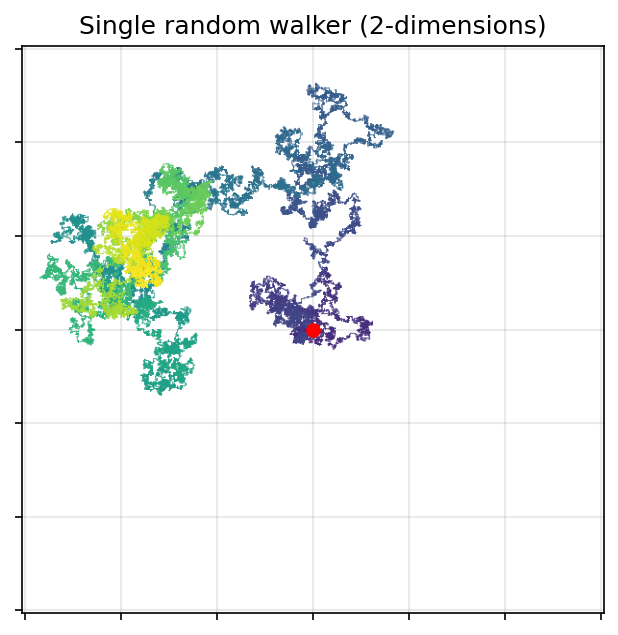

In [15]:
rc('axes', fc='w')
rc('figure', fc='w')
rc('savefig', fc='w')

fig, ax = plt.subplots(1,1,figsize=(5,5),dpi=150,sharex=True,sharey=True)
plt.subplots_adjust(wspace=0.05)

# Plot the random walk path
ax.scatter(x, y, c=np.linspace(0.1,1,len(x)), marker='.', s=1, lw=0, cmap='viridis', vmin=0, vmax=1)
ax.scatter(0, 0, color='red')
ax.tick_params(axis='both',labelbottom=False,labelleft=False)
ax.grid(alpha=0.2, color='.6', lw=1)
xlims = ax.get_xlim()
ylims = ax.get_ylim()
max_lim = max(max(np.abs(xlims)),max(np.abs(ylims)))
ax.set_ylim(-max_lim,max_lim)
ax.set_xlim(-max_lim,max_lim)
ax.set_title('Single random walker (2-dimensions)')



plt.show()

In [16]:
def random_walk_2d(n_walkers=1, t=10000, start_position=(0, 0), p_move=0.25):
    """
    Simulates the path of one or more random walkers on a 2-dimensional lattice.

    Parameters
    ----------
    n_walkers : int, optional
        The number of random walkers to simulate. Default is 1.
    t : int, optional
        The number of steps each random walker will take. Default is 10000.
    start_position : tuple of ints, optional
        The starting (x, y) position of each walker on the lattice. Default is (0, 0).
    p_move : float, optional
        The probability for each direction (up, down, left, right). Default is 0.25,
        indicating an unbiased random walker.

    Returns
    -------
    positions_over_time : numpy.ndarray
        An array representing the positions of each walker at each step. Shape is 
        (n_walkers, t, 2), where each entry is the (x, y) position at each time step.

    Notes
    -----
    - Each step moves the walker either up, down, left, or right with equal probability.
    - This random walk is unbiased, with each step being independent of previous steps.

    Examples
    --------
    >>> random_walk_2d(n_walkers=1, t=5, start_position=(0, 0))
    array([[[0, 0],
            [0, 1],
            [1, 1],
            [1, 0],
            [2, 0]]])
    """
    
    all_walkers = []
    
    for _ in range(n_walkers):
        step_choices = np.random.choice([0, 1, 2, 3], size=t)
        moves = np.array([[0,1], # up
                          [0,-1], # down
                          [1,0], # right
                          [-1,0]] # left
                        )[step_choices]
        positions_over_time = np.cumsum(moves, axis=0) + np.array(start_position)
        all_walkers.append(positions_over_time)
    
    return np.array(all_walkers) if n_walkers > 1 else positions_over_time

In [17]:
t = 10000
start_position = (0,0,0)
step_choices = np.random.choice([0, 1, 2, 3, 4, 5], size=t)
moves = np.array([[0,0,1], # up
                  [0,0,-1], # down
                  [1,0,0], # right
                  [-1,0,0], # left
                  [0,1,0], # forward
                  [0,-1,0]] # backward
                )[step_choices]

positions_over_time = np.cumsum(moves, axis=0) + np.array(start_position)

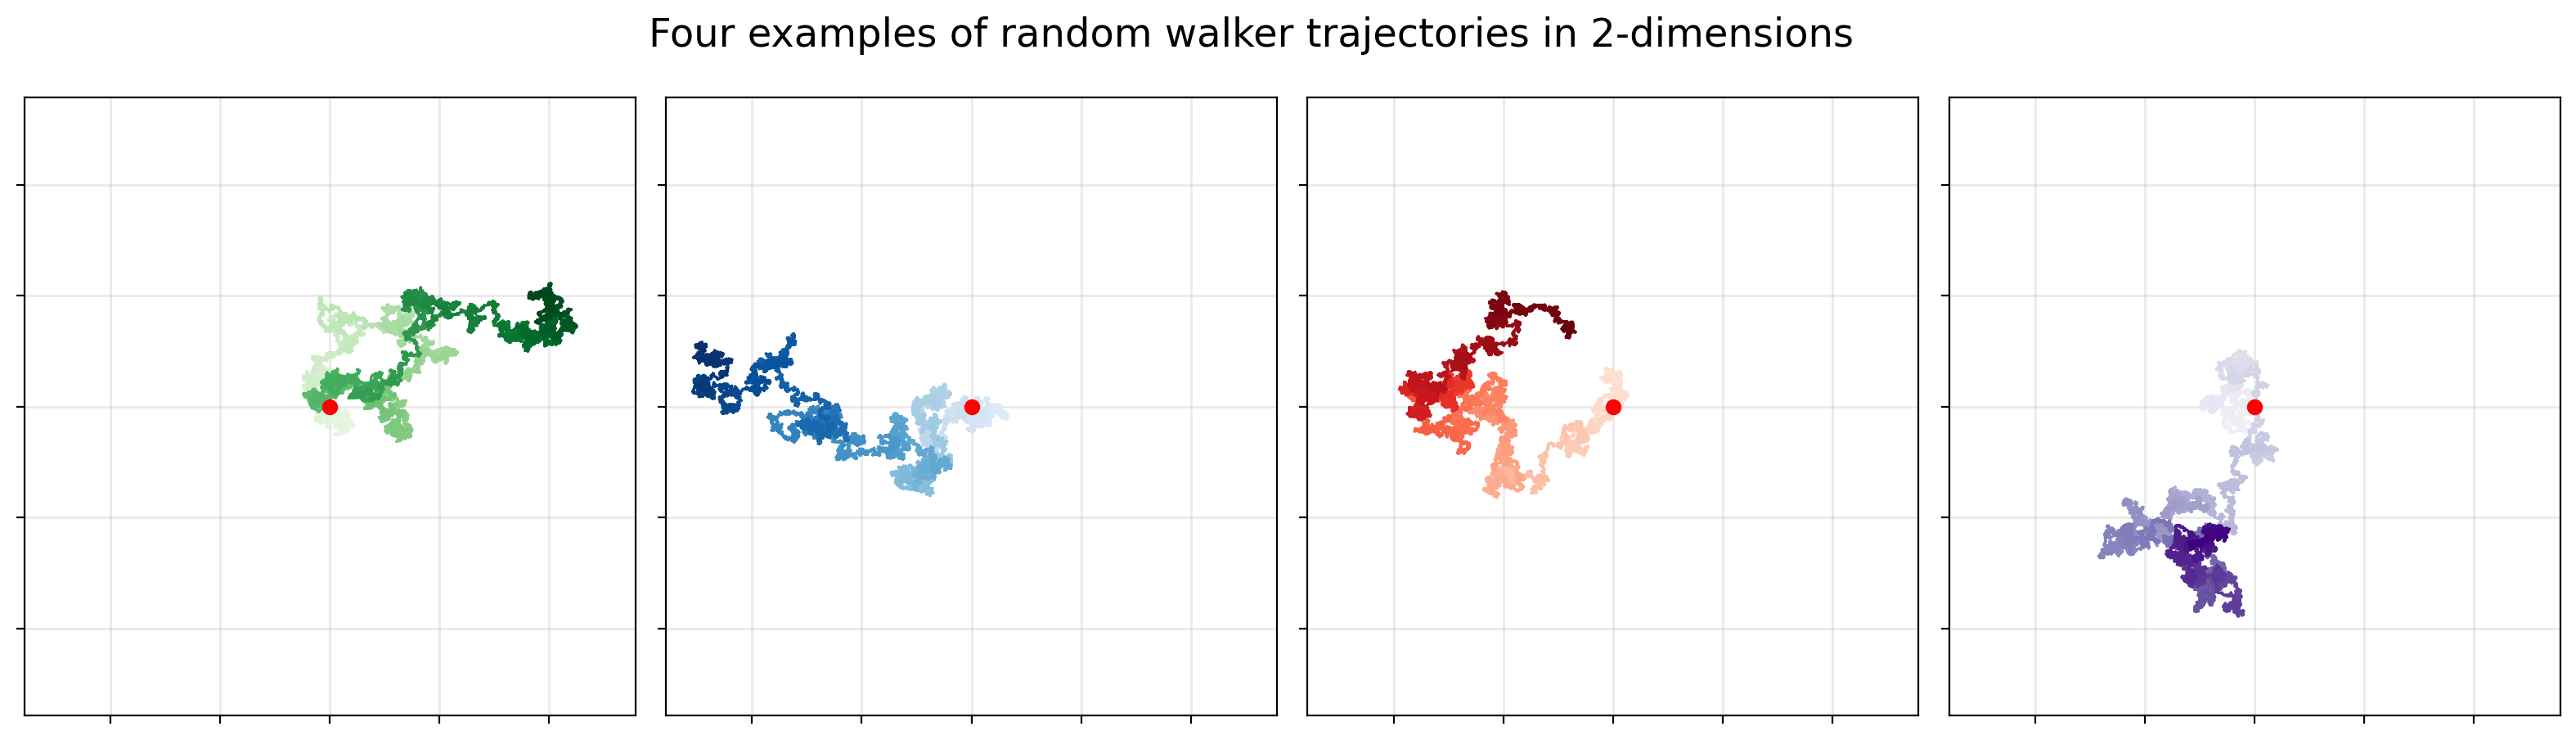

In [18]:
fig, ax = plt.subplots(1,4,figsize=(20,5),dpi=200,sharex=True,sharey=True)
plt.subplots_adjust(wspace=0.05)
max_lims = []
cmaps = ['Greens','Blues','Reds','Purples']

# Set random seed for reproducibility
np.random.seed(5)

# Parameters
num_steps = 100000  # Number of steps in the random walk

for zz in range(len(cmaps)):

    walk = random_walk_2d(1, num_steps)
    x = walk[:,0]
    y = walk[:,1]

    # Plot the random walk path
    ax[zz].scatter(x, y, c=np.linspace(0.1,1,len(x)), marker='o',
                   s=1, lw=0, cmap=cmaps[zz], vmin=0, vmax=1)
    ax[zz].scatter(0, 0, color='red')

    ax[zz].tick_params(axis='both',labelbottom=False,labelleft=False)
    ax[zz].grid(alpha=0.2, color='.6', lw=1)
    xlims = ax[zz].get_xlim()
    ylims = ax[zz].get_ylim()
    max_lim = max(max(np.abs(xlims)),max(np.abs(ylims)))
    max_lims.append(max_lim)


max_lim = max(max_lims)
for a in fig.axes:
    a.set_ylim(-max_lim,max_lim)
    a.set_xlim(-max_lim,max_lim)

plt.suptitle('Four examples of random walker trajectories in 2-dimensions',fontsize='xx-large')


plt.show()

In [29]:
mean_centers = []
num_steps = 10000
runs = random_walk_2d(n_walkers=100, t=num_steps)

for i in range(runs.shape[0]):
    x = runs[i][:,0]
    y = runs[i][:,1]

    mc_i = [(np.nanmean(y[:zz])**2 + \
             np.nanmean(x[:zz])**2)**0.5 for zz in range(len(x))]
    mean_centers.append(mc_i)

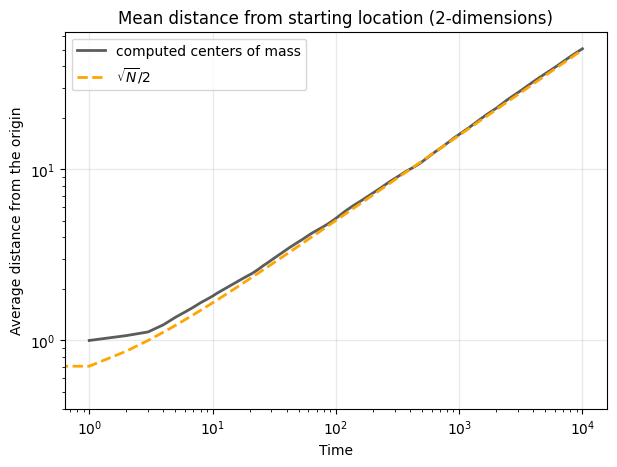

In [20]:
fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)

ax.loglog(np.mean(mean_centers,axis=0),
          color='.2', lw=2, alpha=0.8, label='computed centers of mass')

ax.loglog(np.sqrt(list(range(1,num_steps)))/2,
          lw=2,color='orange',ls='--', label=r'$\sqrt{N}/2$')

ax.legend(loc=2)
ax.set_ylabel('Average distance from the origin')
ax.set_xlabel('Time')
ax.grid(alpha=0.2, color='.6', lw=1)
ax.set_title("Mean distance from starting location (2-dimensions)")


plt.show()

_____________

![](images/randomwalk_stones_art.png)

## Random walks on networks
Having explored random walks in one and two dimensions, we now extend the concept to networks! What *dimension* do we usually consider networks to have?




### Key Concepts and Definitions

In a network, each node has its own transition probabilities to its neighboring nodes, often determined by its degree, meaning the probability of a walker transitioning from one node to another varies according to the structure of the network. For an undirected network, we define a basic random walk as follows:

1. **Starting Point**: The walker begins at an "origin" node.
2. **Transition Rules**: At each time step, the walker moves to a neighboring node, (usually) chosen uniformly from all neighbors of the current node. This is an **unbiased random walk** on an undirected network.
3. **Transition Probability**: The probability of moving from node $i$ to an adjacent node $j$ is inversely proportional to the degree of $i$ (i.e., $ p_{ij} = \frac{1}{k_i} $).

____________


### Common properties to calculate with random walks
1. **Hitting Time**: The expected time for a walker to reach a specific target node for the first time.
2. **Return Probability**: The probability that the walker will return to the origin node after a given time $t$.
3. **Stationary Distribution**: For large $ t $, the walker’s position converges to a stationary distribution, where the probability of finding the walker at each node is stable. For an undirected network, the stationary probability $ \pi_i $ at node \( i \) is proportional to its degree, $ \pi_i = \frac{k_i}{2 E} $, where $E$ is the number of edges.
4. **Mixing Time**: The time required for the distribution of the walker’s position to approximate the stationary distribution closely.
_______


### Applications and Relevance

Random walks on networks serve as models for a wide range of processes, including:
- **Network Navigation and Search**: Models how information or resources are spread or located within a network.
- **PageRank**: Google’s PageRank algorithm uses a variant of a random walk to rank websites by their importance based on link structure.
- **Diffusion in Social Networks**: Models information spread, where each "walker" represents the spread of ideas, memes, or infections.

This section will introduce random walks on networks through hands-on examples, providing an intuitive understanding of how different network structures influence the dynamics of the walk.

### ...but first... code it yourself!
_________

In [21]:
def random_walk_network(G, start_node, steps):
    """
    Simulates a random walk on a network, represented as a graph.

    Starting from the specified node, the walker moves to a randomly selected 
    neighboring node at each step. If the walker reaches an isolated node (one with 
    no neighbors), the walk terminates early.

    Parameters
    ----------
    G : networkx.Graph
        The graph representing the network on which the random walk is performed. 
        Nodes should be connected by edges, as each edge represents a possible transition.
    start_node : node
        The node in G where the random walk starts. Must be a valid node in the graph.
    steps : int
        The number of steps the random walker will attempt to take. Note that the walk 
        may terminate early if an isolated node is reached.

    Returns
    -------
    path : list
        A list of nodes representing the path taken by the walker, starting from 
        `start_node`. The list length will be `steps + 1` unless the walk terminates early 
        at an isolated node.

    Notes
    -----
    - At each step, the walker chooses a neighboring node uniformly at random.
    - If the walker reaches an isolated node (one with no neighbors), the walk stops early.
    - This function assumes the graph `G` is undirected, but it can be adapted for 
      directed networks by modifying the neighbor selection.

    Examples
    --------
    >>> G = nx.path_graph(5)  # Simple path graph with 5 nodes
    >>> random_walk_network(G, start_node=0, steps=10)
    [0, 1, 2, 1, 2, 3, 2, 1, 0, 1, 2]
    """
    # Initialize the path list with the starting node

    pass
    
    
    return path  # Return the full path taken by the walker

In [22]:
G = nx.karate_club_graph()

(don't look below please)
________________

In [23]:
def random_walk_network(G, start_node, steps):
    """
    Simulates a random walk on a network, represented as a graph.

    Starting from the specified node, the walker moves to a randomly selected 
    neighboring node at each step. If the walker reaches an isolated node (one with 
    no neighbors), the walk terminates early.

    Parameters
    ----------
    G : networkx.Graph
        The graph representing the network on which the random walk is performed. 
        Nodes should be connected by edges, as each edge represents a possible transition.
    start_node : node
        The node in G where the random walk starts. Must be a valid node in the graph.
    steps : int
        The number of steps the random walker will attempt to take. Note that the walk 
        may terminate early if an isolated node is reached.

    Returns
    -------
    path : list
        A list of nodes representing the path taken by the walker, starting from 
        `start_node`. The list length will be `steps + 1` unless the walk terminates early 
        at an isolated node.

    Notes
    -----
    - At each step, the walker chooses a neighboring node uniformly at random.
    - If the walker reaches an isolated node (one with no neighbors), the walk stops early.
    - This function assumes the graph `G` is undirected, but it can be adapted for 
      directed networks by modifying the neighbor selection.

    Examples
    --------
    >>> G = nx.path_graph(5)  # Simple path graph with 5 nodes
    >>> random_walk_network(G, start_node=0, steps=10)
    [0, 1, 2, 1, 2, 3, 2, 1, 0, 1, 2]
    """
    # Initialize the path list with the starting node
    path = [start_node]
    
    # Set the current node to the starting node
    current_node = start_node
    
    # Iterate for the specified number of steps
    for _ in range(steps):
        # Get the list of neighbors of the current node
        neighbors = list(G.neighbors(current_node))
        
        # If the current node has neighbors, move to a randomly chosen neighbor
        if neighbors:
            next_node = np.random.choice(neighbors)  # Select a random neighbor
            path.append(next_node)  # Append the selected neighbor to the path
            current_node = next_node  # Update the current node
        else:
            # If no neighbors (isolated node), terminate the walk early
            break


    return path  # Return the full path taken by the walker

In [24]:
np.random.seed(2)
G = nx.karate_club_graph()
pos = nx.spring_layout(G)  # Layout for node positions
pos[33] = np.array([0.28, 0.16])
pos[13] = np.array([-0.09983414, 0.01])

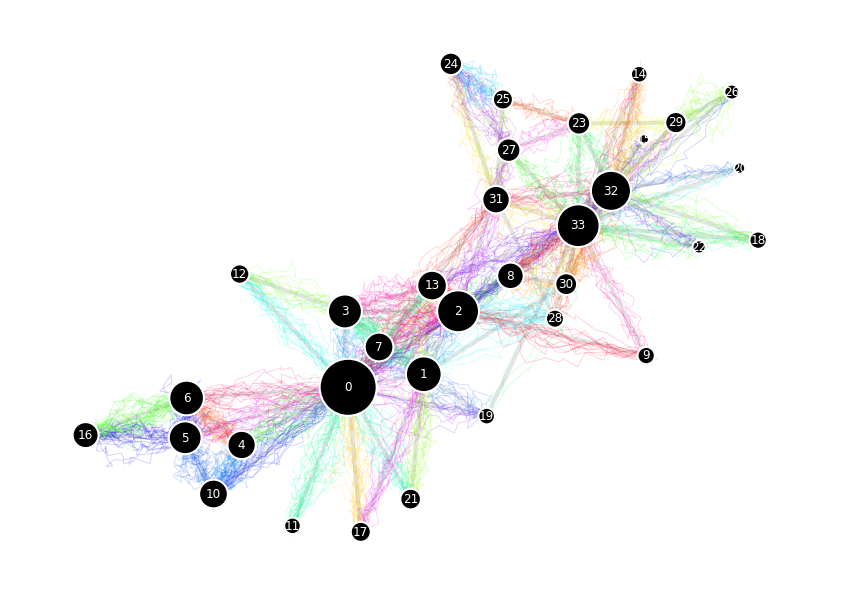

In [25]:
from collections import Counter

len_path = 1000
edge_cols = plt.cm.hsv(np.linspace(0,1,G.number_of_edges()))
np.random.seed(1)
np.random.shuffle(edge_cols)
edge_colors2 = {(i[0],i[1]):edge_cols[ix] for ix, i in enumerate(G.edges())}
edge_colors = {(i[1],i[0]):edge_cols[ix] for ix, i in enumerate(G.edges())}
edge_colors.update(edge_colors2)

path = random_walk_network(G, 0, len_path)

node_visits = {i:dict(Counter(path))[i] for i in G.nodes()}
node_sizes = {i:750*j/max(node_visits.values()) for i,j in node_visits.items()}

xvals_path = list(list(zip(*[pos[i] for i in path]))[0])
yvals_path = list(list(zip(*[pos[i] for i in path]))[1])

xvals = list(list(zip(*[pos[i] for i in G.nodes()]))[0])
yvals = list(list(zip(*[pos[i] for i in G.nodes()]))[1])

fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=150)

cols = plt.cm.viridis(np.linspace(0,1,len_path))
path_wiggle_n = 20
path_wiggle_var = 0.01


for i in range(len_path-1):
    start_xi = xvals_path[i]
    end_xi = xvals_path[i+1]
    col_i = edge_colors[(path[i],path[i+1])]
    
    ogx = np.linspace(start_xi, end_xi, path_wiggle_n)
    og2x = ogx.copy()

    og2x_first = list(np.linspace(ogx[0], ogx[int(path_wiggle_n/2)] + np.random.normal(0,path_wiggle_var*3),
                                 int(path_wiggle_n/2)))
    og2x_second = list(np.linspace(og2x_first[-1], ogx[-1], int(path_wiggle_n/2)))
    path_plot_xi = np.array(og2x_first+og2x_second) + np.random.normal(0, path_wiggle_var, path_wiggle_n)
    

    start_yi = yvals_path[i]
    end_yi = yvals_path[i+1]
    ogy = np.linspace(start_yi, end_yi, path_wiggle_n)
    og2y = ogy.copy()

    og2y_first = list(np.linspace(ogy[0], ogy[int(path_wiggle_n/2)] + np.random.normal(0,path_wiggle_var*3),
                                 int(path_wiggle_n/2)))
    og2y_second = list(np.linspace(og2y_first[-1], ogy[-1], int(path_wiggle_n/2)))
    path_plot_yi = np.array(og2y_first+og2y_second) + np.random.normal(0, path_wiggle_var, path_wiggle_n)
    

    ax.plot(path_plot_xi, path_plot_yi, alpha=0.2, color=col_i, lw=0.4)

nx.draw_networkx_nodes(G, pos, node_color='k', node_size=list(node_sizes.values()), ax=ax, edgecolors='w')
nx.draw_networkx_edges(G, pos, edge_color='.5', width=2, ax=ax, alpha=0.2)
nx.draw_networkx_labels(G, pos, font_color='w', ax=ax, font_size='xx-small')

# ax.scatter(xvals,yvals, c='k',s=list(node_sizes.values()),zorder=20,ec='w')

ax.set_axis_off()

plt.show()

_______________

## Random walk cover time on networks

The *cover time* is the expected number of steps to reach every node, starting from a given initial distribution.

In [26]:
import random
def random_walk_coverage_time(G, start_node=None):
    """
    Simulates a random walk on a network to determine the time taken to cover all nodes.

    Starting from a specified or random node, the walker moves to a randomly chosen 
    neighboring node at each step. The walk continues until all nodes in the graph 
    have been visited at least once.

    Parameters
    ----------
    G : networkx.Graph
        The graph representing the network on which the random walk is performed.
    start_node : node, optional
        The node where the random walk starts. If None, a random node is chosen.

    Returns
    -------
    coverage_time : int
        The number of steps required to visit every node in the graph at least once.
    path : list
        A list of nodes representing the path taken by the walker.

    Notes
    -----
    - This function assumes the graph `G` is undirected and connected.
    - If the graph has isolated components, some nodes may remain unvisited.

    Examples
    --------
    >>> G = nx.path_graph(5)
    >>> random_walk_coverage_time(G)
    (7, [2, 1, 0, 1, 2, 3, 4])
    """
    
    # Initialize the starting node
    source = start_node if start_node is not None else random.choice(list(G.nodes))
    nodes_covered = set([source])  # Track visited nodes
    path = [source]                # Track the path of the walker
    N = G.number_of_nodes()        # Total number of nodes in the graph
    t = 0                          # Step counter
    
    if not nx.is_connected(G):
        return 'help',[]
#         print('Help')

    # Continue walking until all nodes have been visited
    while len(nodes_covered) < N:
        # Get the neighbors of the current node
        neighbors = list(G.neighbors(source))
        
        # Choose a random neighbor and move there
        target = random.choice(neighbors)
        path.append(target)
        nodes_covered.add(target)  # Add the new node to the visited set
        source = target            # Update the current node
        t += 1                     # Increment the step count
    
    return t, path  # Return the time to cover all nodes and the path taken

### How does cover time vary by network + size + structure?

1. Simulate 10 BA networks of size [10, 50, 100, 500, 1000] with m = 6, and measure their average cover times.
2. Simulate 10 ER networks of same size and density, and measure their average cover times.

In [27]:
# Ns = np.logspace(1, 3, 20)
Ns = [10, 50, 100, 500, 1000]
m = 6
n_iter = 100

cover_ba = []
cover_er = []

for N in Ns:
    N = int(N)
    print(N)
    cover_ba_n = []
    cover_er_n = []
    for _ in range(n_iter):
        G_ba = nx.barabasi_albert_graph(N, m)
        cover_t_ba, _ = random_walk_coverage_time(G_ba)
        cover_ba_n.append(cover_t_ba)

        G_er = nx.erdos_renyi_graph(N, nx.density(G_ba))
        cover_t_er, _ = random_walk_coverage_time(G_er)
        if not cover_t_er == 'help':
            cover_er_n.append(cover_t_er)
        
    cover_ba.append(np.mean(cover_ba_n))
    cover_er.append(np.mean(cover_er_n))

10
50
100
500
1000


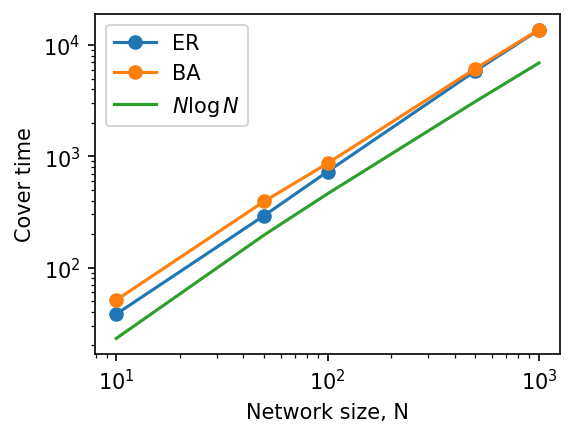

In [28]:
fig, ax = plt.subplots(1,1,figsize=(4,3),dpi=150)

ax.loglog(Ns, cover_er, 'o-', label='ER')
ax.loglog(Ns, cover_ba, 'o-', label='BA')
ax.loglog(Ns, [N*np.log(N) for N in Ns], label=r'$N \log N$')

ax.legend()
ax.set_xlabel('Network size, N')
ax.set_ylabel('Cover time')

plt.show()

### If there's time: Work in pairs to code the *mean first passage time* in a network
____________

### _Mean First-Passage Time (MFPT)_:
* May also be called "Access or Hitting Time" to computer scientists.

* The mean first passage time from node $i$ to node $j$ is the expected number of time–steps for reaching the node $j$ for the first time, given that initially the walker starts from node $i$.

* Let us define the probability of reaching a node $j$ after $n$ steps starting from any other node:
$p(j, n) = p_j (1-p_j)^{n-1}$

* Approximately,
$T_j = \sum_n^{\infty}\Delta t \times n \times p(j,n) \propto \frac{1}{p_j} = \frac{\sum_i k_i}{k_j}$

* More mathematically,

    * $T_{ij}$ : expected number of steps before node $j$ is visited, starting from node $i$.
    
    * $T_{ii} = \frac{1}{p_i}$
    
    * $T_{ij} = \frac{F^{\#}_{jj} - F^{\#}_{ij}}{p_j}$
    
    * $\mathbf{F}^{\#}$ is the generalized inverse matrix of $\mathbf{F} = \mathbf{I} - \mathbf{M} = \mathbf{I} - \mathbf{AD}^{-1}$
    
    * for proofs, see 
    
        [1] Meyer, 1975, "The role of the group inverse in the theory of finite Markov chains"
        
        [2] Cho & Meyer, 2000, "Comparison of perturbation bounds for the stationary distribution of a Markov chain"
        
* __Notes__
    * In contrast to the stationary distribution vector, the mean first passage times give us information about the ___short range behavior of the chain___. 
    
    * Think about a practical weather forecasts: 
        * we are going to have vacation somewhere, but find it is raining now there
        * what are we interested in? 
            * what is the average number of rainy days vs sunny days throughout the year
            
          OR
            
            * how long we can expect it to turn sunny, given that it is now raining ?


__________
## Next time...
Dynamics 2 — Compartmental Models and Spreading Processes `class_17_dynamics2.ipynb`
_______

## References and further resources:

1. Class Webpages
    - Jupyter Book: https://network-science-data-and-models.github.io/phys7332_fa25/README.html
    - Github: https://github.com/network-science-data-and-models/phys7332_fa25/
    - Syllabus and course details: https://brennanklein.com/phys7332-fall25
2. Masuda, Porter, & Lambiotte (2017). Random walks and diffusion on networks. *Physics Reports*, 716, 1-58. https://doi.org/10.1016/j.physrep.2017.07.007
3. The cover time of sparse random graphs - https://doi.org/10.1002/rsa.20151